<a href="https://colab.research.google.com/github/wardhakashif570/deep-learning/blob/master/The_Reuters_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loading the Reuters dataset**

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
num_words=10000)

In [0]:
len(train_data)

8982

In [0]:
len(test_data)

2246

In [0]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [0]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

**Preparing the data**

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [0]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results


one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [0]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

Using TensorFlow backend.


**Building your network**

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

**Compiling the model**


In [0]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

**Setting aside a validation set**

In [0]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

**Training the model**

In [0]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 2.6006 - accuracy: 0.5509 - val_loss: 1.7026 - val_accuracy: 0.6410
Epoch 2/20
16/16 [==============================] - 1s 43ms/step - loss: 1.4094 - accuracy: 0.7013 - val_loss: 1.3101 - val_accuracy: 0.7130
Epoch 3/20
16/16 [==============================] - 1s 43ms/step - loss: 1.0622 - accuracy: 0.7721 - val_loss: 1.1562 - val_accuracy: 0.7460
Epoch 4/20
16/16 [==============================] - 1s 43ms/step - loss: 0.8467 - accuracy: 0.8217 - val_loss: 1.0490 - val_accuracy: 0.7840
Epoch 5/20
16/16 [==============================] - 1s 43ms/step - loss: 0.6756 - accuracy: 0.8609 - val_loss: 0.9902 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 1s 43ms/step - loss: 0.5496 - accuracy: 0.8855 - val_loss: 0.9434 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 44ms/step - loss: 0.4478 - accuracy: 0.9070 - val_loss: 0.9191 - val_accuracy: 0.8120
Epoch 8/20
16

**Plotting the training and validation loss**

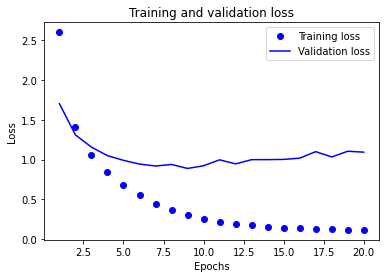

In [0]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

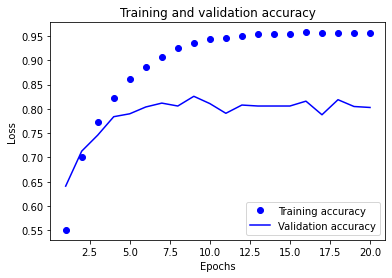

In [0]:
plt.clf()
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**Retraining a model from scratch**

In [0]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 47ms/step - loss: 2.5253 - accuracy: 0.5441 - val_loss: 1.6784 - val_accuracy: 0.6520
Epoch 2/9
16/16 [==============================] - 1s 43ms/step - loss: 1.4035 - accuracy: 0.7108 - val_loss: 1.2907 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 1s 44ms/step - loss: 1.0413 - accuracy: 0.7830 - val_loss: 1.1208 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 1s 53ms/step - loss: 0.8247 - accuracy: 0.8259 - val_loss: 1.0179 - val_accuracy: 0.7880
Epoch 5/9
16/16 [==============================] - 1s 43ms/step - loss: 0.6561 - accuracy: 0.8621 - val_loss: 0.9677 - val_accuracy: 0.7980
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.5220 - accuracy: 0.8939 - val_loss: 0.9137 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 1s 42ms/step - loss: 0.4216 - accuracy: 0.9137 - val_loss: 0.9422 - val_accuracy: 0.8030
Epoch 8/9
16/16 [===

In [0]:
results

In [0]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18432769367764915

**Generating predictions for new data**

In [0]:
predictions = model.predict(x_test)

In [0]:
np.sum(predictions[0])

1.0000001

In [0]:
np.argmax(predictions[0])

3

**different way to handle the labels and the loss**

In [0]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [0]:
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])